<a href="https://colab.research.google.com/github/Maisho20/uninformJobsheet/blob/main/AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tugas Kecerdasan Buatan Minggu 15 - Computer Vision


---

##Nama    : Sabbaha Naufal Erwanda
##Absen   : 26
##NIM     : 2141720221
##dataset : Birds vs Drone Dataset
##https://www.kaggle.com/datasets/harshwalia/birds-vs-drone-dataset 

In [ ]:
# mount google drive
from google.colab import drive 
drive.mount('/content/drives')

Mounted at /content/drives


In [ ]:
#import beberapa library dari python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

import os,glob


import PIL
import tensorflow as tf
import matplotlib.image as image
import seaborn as sns
from PIL import Image

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import img_to_array, load_img
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(2)

In [ ]:
dir_path = '/content/drives/MyDrive/Colab Notebooks/BirdVsDrone'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes : ', NUM_CLASSES)

['Birds', 'Drones']
Number of classes :  2


In [ ]:
bird_path='/content/drives/MyDrive/Colab Notebooks/BirdVsDrone/Birds'
drone_path='/content/drives/MyDrive/Colab Notebooks/BirdVsDrone/Drones'

In [ ]:
bird_path_grey='./BirdsGray'
drone_path_grey='./DronesGray'

In [ ]:
#buat DataFrame kosong untuk gambar RGB
df = pd.DataFrame(columns=['path','label'])

#ulangi gambar burung dan beri label 1
for dirname, _, filenames in os.walk(bird_path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'bird']],columns=['path','label']))

#lewati gambar Drone dan beri label 0
for dirname, _, filenames in os.walk(drone_path):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'drone']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#acak kumpulan data untuk mendistribusikan ulang label
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,path,label
0,/content/drives/MyDrive/Colab Notebooks/BirdVs...,bird
1,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
2,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
3,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
4,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
5,/content/drives/MyDrive/Colab Notebooks/BirdVs...,bird
6,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
7,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
8,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone
9,/content/drives/MyDrive/Colab Notebooks/BirdVs...,drone


In [ ]:
df.shape

(828, 2)

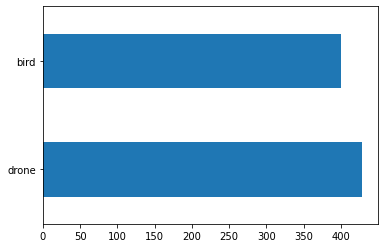

In [ ]:
df['label'].value_counts().plot.barh()

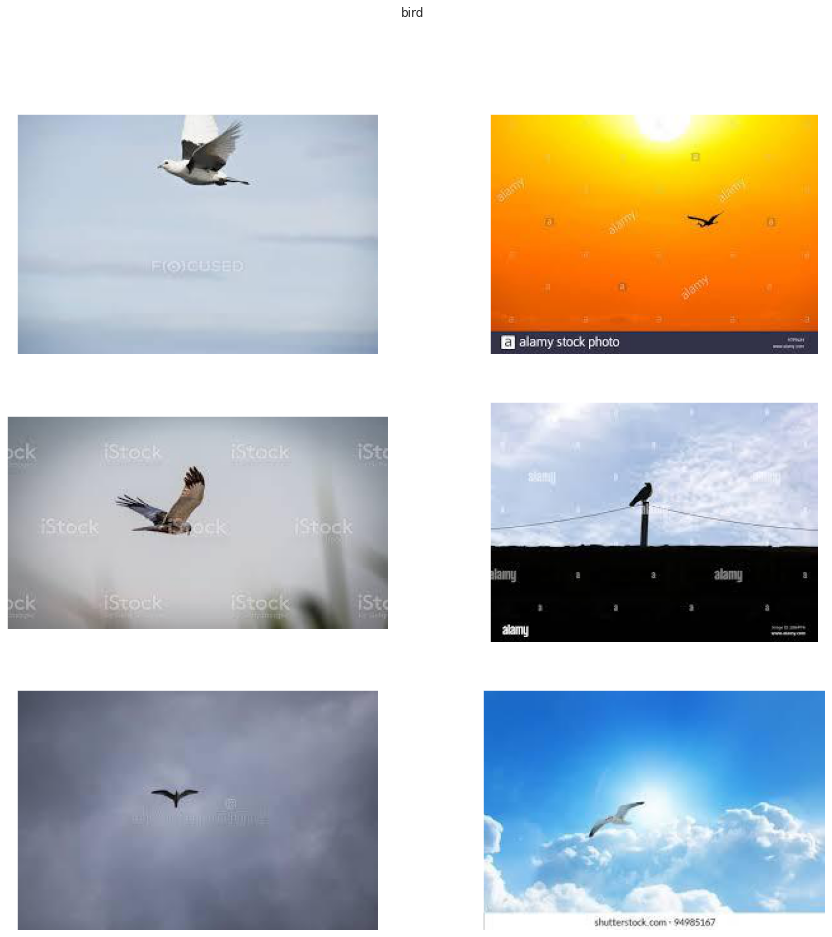

In [ ]:
from keras.preprocessing import image

label = 'bird' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('bird')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = load_img(path)
    img = img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

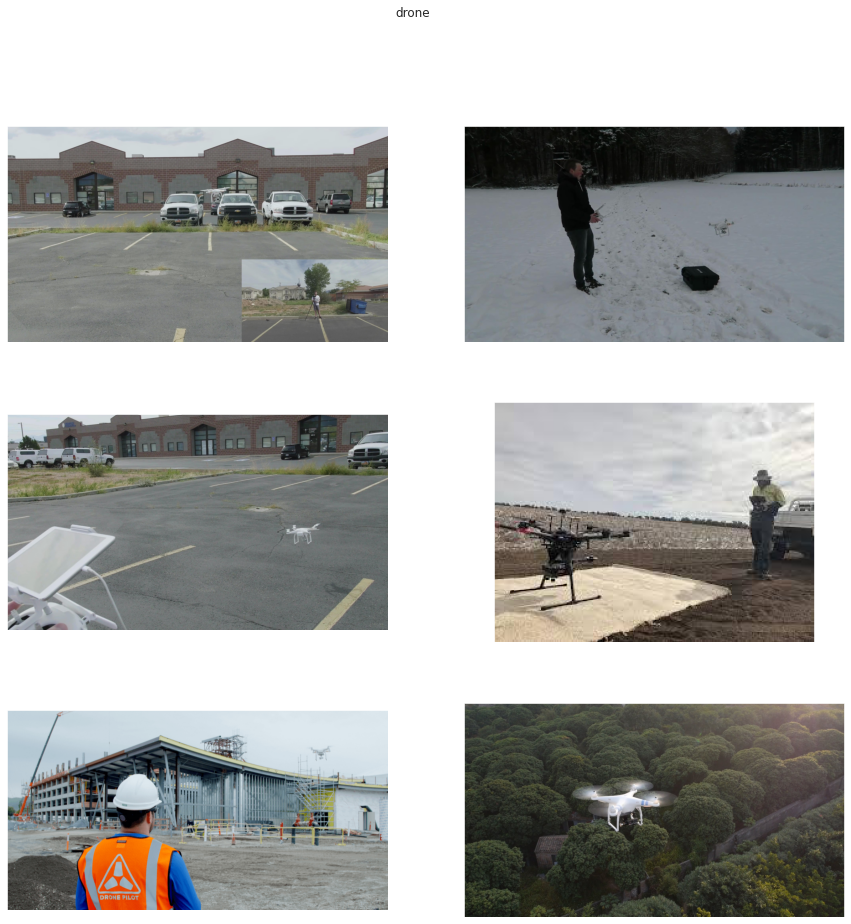

In [ ]:
label = 'drone' #label untuk nama gambar
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set banyak gambar
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('drone')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = load_img(path)
    img = img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
generator = ImageDataGenerator(
        rescale = 1/255,
        validation_split=0.2,
        rotation_range=8, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.8,1.3] # brightness
)

In [ ]:
#menggunakan sebuah objek "generator" untuk membaca data dari dataframe yang diberikan
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                          batch_size=32,
                                          class_mode='categorical',subset='training',seed=42)
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                        batch_size=32,
                                        class_mode='categorical',subset='validation',seed=42)

Found 661 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [ ]:
#mengembalikan informasi tentang bentuk atau ukuran dari citra yang disimpan dalam objek
train_gen.image_shape

(256, 256, 3)

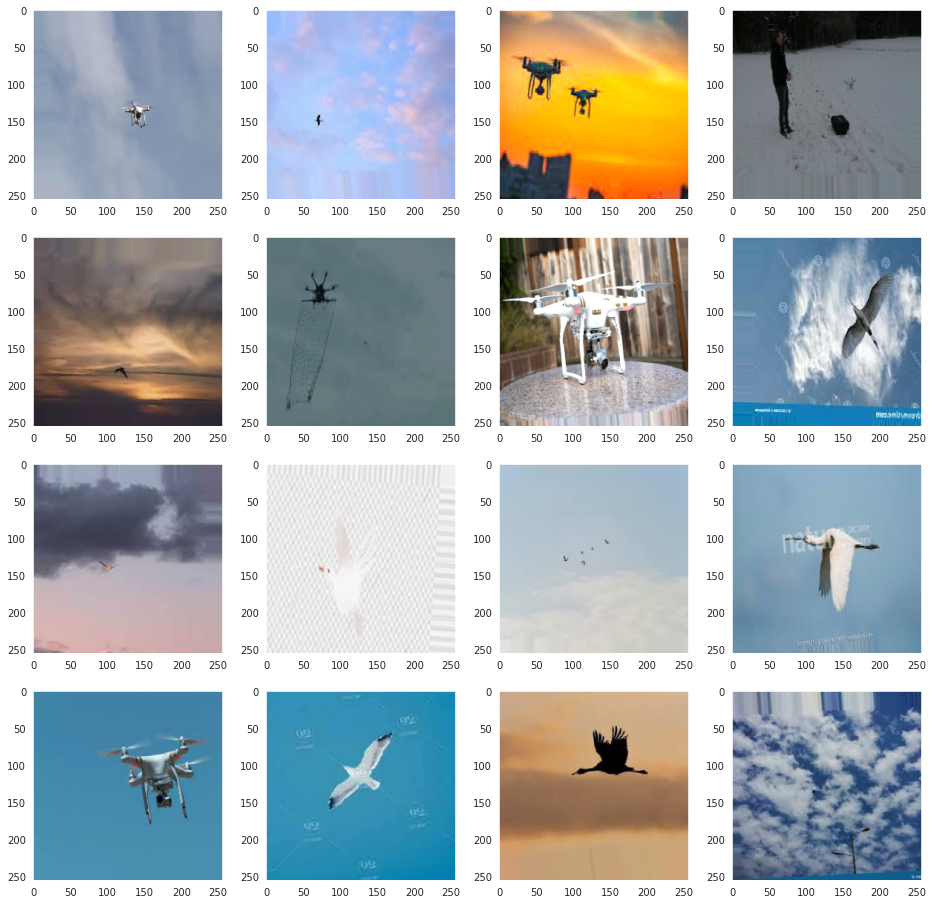

In [ ]:

w = 10
h = 10

x= train_gen.next()
image = x[0]
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = image[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
#mengubah warna menjadi warna grayscale
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

In [ ]:
image = cv.imread("/content/drives/MyDrive/Colab Notebooks/BirdVsDrone/Birds/singleBirdinsky0.jpeg")

img=to_grayscale_then_rgb(image)
print(img.shape)

(598, 900, 1)


In [ ]:
generator_grey = ImageDataGenerator(
        rescale = 1/255,
        validation_split=0.2,
        rotation_range=8, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.8,1.3] # brightness
    
)

In [ ]:
#menggunakan sebuah objek "generator_grey" untuk membaca data dari dataframe yang diberikan
train_gen_grey = generator_grey.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                          batch_size=32,
                                        color_mode='grayscale',
                                          class_mode='categorical',subset='training',seed=42)
val_gen_grey = generator_grey.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                        batch_size=32,
                                      color_mode='grayscale',
                                        class_mode='categorical',subset='validation',seed=42)

Found 661 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


In [ ]:
train_gen_grey.image_shape

(256, 256, 1)

In [ ]:
val_gen_grey.image_shape

(256, 256, 1)

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 24,153,538
Trainable params: 565,826
Non-t

In [ ]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_resnet = resnet_model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5
21/21 [==============================] - 229s 11s/step - loss: 81.7740 - accuracy: 0.5113 - val_loss: 0.7519 - val_accuracy: 0.4545
Epoch 2/5
21/21 [==============================] - 180s 9s/step - loss: 0.7939 - accuracy: 0.4554 - val_loss: 0.6911 - val_accuracy: 0.5455
Epoch 3/5
21/21 [==============================] - 173s 8s/step - loss: 0.6980 - accuracy: 0.5144 - val_loss: 0.7091 - val_accuracy: 0.4545
Epoch 4/5
21/21 [==============================] - 177s 8s/step - loss: 0.8752 - accuracy: 0.4750 - val_loss: 0.6892 - val_accuracy: 0.5455
Epoch 5/5
21/21 [==============================] - 180s 9s/step - loss: 0.7030 - accuracy: 0.5098 - val_loss: 0.7775 - val_accuracy: 0.5455


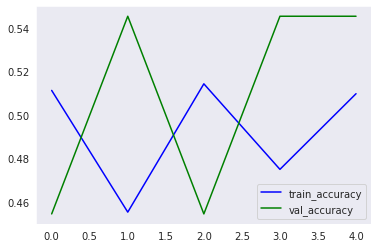

In [ ]:
hist=history_resnet.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [ ]:
resnet_model.evaluate(train_gen)

21/21 [==============================] - 143s 7s/step - loss: 0.8134 - accuracy: 0.5113


[0.8133761286735535, 0.5113464593887329]

In [ ]:
resnet_model.evaluate(val_gen)

6/6 [==============================] - 35s 5s/step - loss: 0.7775 - accuracy: 0.5455


[0.7775281667709351, 0.5454545617103577]

In [ ]:
files=val_gen.filenames
class_dict=val_gen.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key   # dictionary of the form class index: class name

In [ ]:
predictions = resnet_model.predict(val_gen)

6/6 [==============================] - 37s 5s/step


In [ ]:
from keras.preprocessing import image

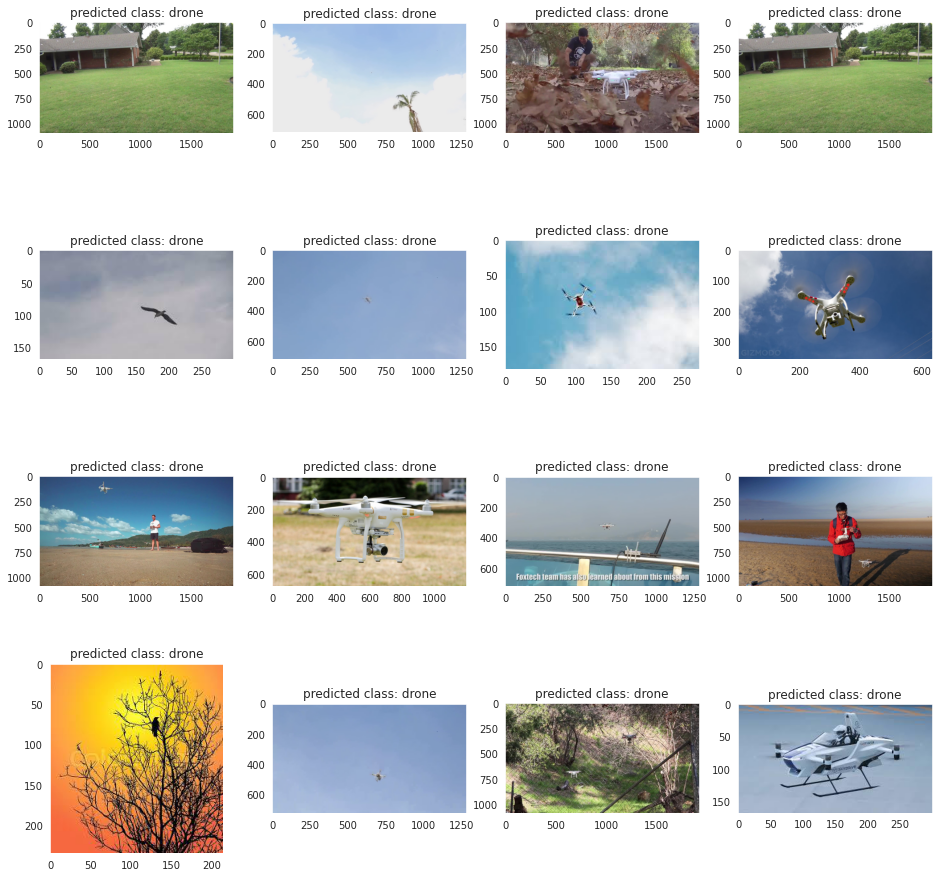

In [ ]:
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    index=np.argmax(predictions[i])
    klass=rev_dict[index] 
    im = Image.open(files[i])
    img=np.array(im)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(f'predicted class: { klass}')
plt.show()

In [ ]:
dict_path=dict(zip(df.path, df.label))

In [ ]:
dict_path[files[i]]

'drone'

In [ ]:
len(predictions)

165

In [ ]:
cnt=0
columns = 6
rows = 6
for i in range(1, 165):
    index=np.argmax(predictions[i])
    pred_class=rev_dict[index] 
    actual_label=dict_path[files[i]]
    if(actual_label!=pred_class):
       cnt+=1
print(f'Number of misclassified example {cnt} out of {len(predictions)} examples')

Number of misclassified example 74 out of 165 examples


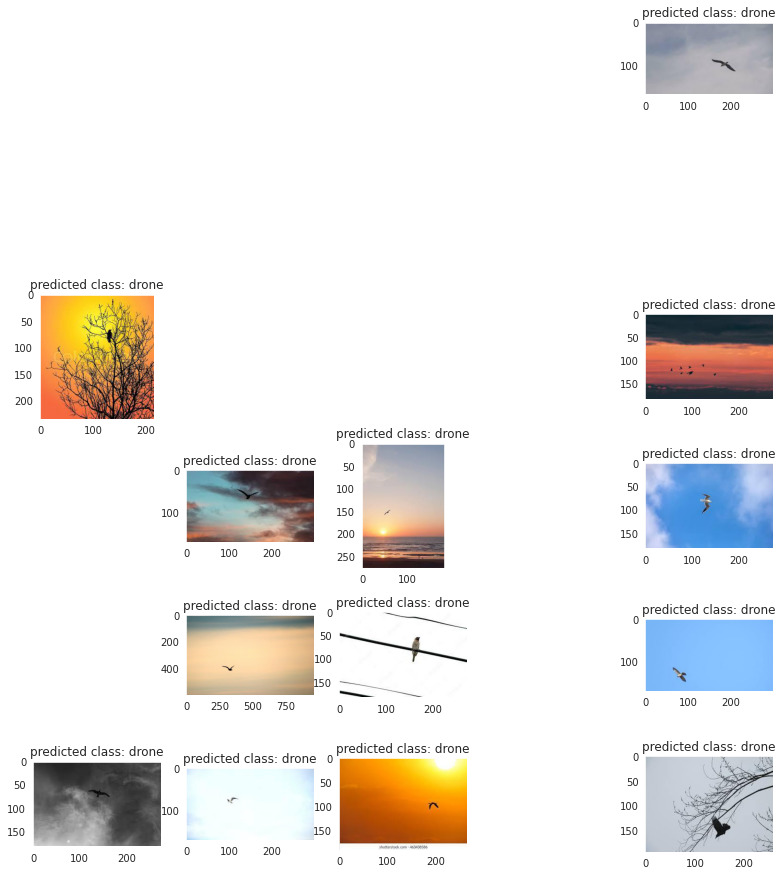

In [ ]:
fig = plt.figure(figsize=(16, 16))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    index=np.argmax(predictions[i])
    pred_class=rev_dict[index] 
    im = Image.open(files[i])
    actual_label=dict_path[files[i]]
    if(actual_label!=pred_class):
        img=np.array(im)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(f'predicted class: { pred_class}')
plt.show()